# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# URL
url= "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# query_url
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=aea8f25e016b6691755a71c8e6211298&units=imperial&q='

In [33]:
# Empty lists = Info required 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

weather_data = []

# Start point for record
record = 0

# Start point for Set(s)
set_number = 1

# Print the beginning of the results
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Loop through the cities to request the info needed from
# each one to create the data frame
for city in cities:  
    record += 1
    if record % 50 ==0:
        set_number += 1
        record = 0
    try:
        response = requests.get(query_url+city).json()
        city_name = response["name"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]     
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        
        weather_data.append({
            'City': city_name,
            'Cloudiness': cloudiness,
            'Country': country,
            'Date': date,
            'Humidity' : humidity,
            'Lat' : lat,
            'Lng': lng,
            'Max Temp': max_temp,
            'Wind Speed': wind_speed
         })
    
        print(f"Processing Record {record} of Set {set_number} | {city_name}")
    
    
    except: 
        print(f"City not found. Skipping...")
    

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 1 | Omboue
Processing Record 4 of Set 1 | Bethel
City not found. Skipping...
Processing Record 6 of Set 1 | Sabang
Processing Record 7 of Set 1 | Poum
Processing Record 8 of Set 1 | Cape Town
Processing Record 9 of Set 1 | Qaanaaq
Processing Record 10 of Set 1 | Butaritari
City not found. Skipping...
Processing Record 12 of Set 1 | Carnarvon
Processing Record 13 of Set 1 | Scottsbluff
Processing Record 14 of Set 1 | Victor Harbor
Processing Record 15 of Set 1 | Yinchuan
Processing Record 16 of Set 1 | Puteyets
Processing Record 17 of Set 1 | Nushki
Processing Record 18 of Set 1 | Mataura
Processing Record 19 of Set 1 | Rikitea
Processing Record 20 of Set 1 | Plettenberg Bay
Processing Record 21 of Set 1 | Ribeira Grande
Processing Record 22 of Set 1 | Tasiilaq
Processing Record 23 of Set 1 | Temiscaming
Processing Record 24 of Set 1 | Ushuaia
Process

Processing Record 9 of Set 5 | Nicoya
Processing Record 10 of Set 5 | Havoysund
Processing Record 11 of Set 5 | Vardo
Processing Record 12 of Set 5 | Kharp
Processing Record 13 of Set 5 | Pullman
Processing Record 14 of Set 5 | Klaksvik
Processing Record 15 of Set 5 | Sarab
Processing Record 16 of Set 5 | New Norfolk
Processing Record 17 of Set 5 | Dakar
Processing Record 18 of Set 5 | Beringovskiy
Processing Record 19 of Set 5 | Heze
Processing Record 20 of Set 5 | Cabras
Processing Record 21 of Set 5 | Hobart
Processing Record 22 of Set 5 | Faro
Processing Record 23 of Set 5 | Papetoai
Processing Record 24 of Set 5 | Betanzos
Processing Record 25 of Set 5 | Upernavik
Processing Record 26 of Set 5 | Xuddur
Processing Record 27 of Set 5 | Baykit
Processing Record 28 of Set 5 | Neiafu
Processing Record 29 of Set 5 | Kommunisticheskiy
Processing Record 30 of Set 5 | Pacific Grove
City not found. Skipping...
Processing Record 32 of Set 5 | Sobolevo
Processing Record 33 of Set 5 | Vaasa
Pr

Processing Record 16 of Set 9 | Parana
Processing Record 17 of Set 9 | Vrangel
Processing Record 18 of Set 9 | Luganville
Processing Record 19 of Set 9 | Moron
Processing Record 20 of Set 9 | Kalmunai
Processing Record 21 of Set 9 | Hasaki
Processing Record 22 of Set 9 | Nadym
Processing Record 23 of Set 9 | Cap Malheureux
Processing Record 24 of Set 9 | Kaohsiung
Processing Record 25 of Set 9 | Kralendijk
Processing Record 26 of Set 9 | Magadan
Processing Record 27 of Set 9 | Brumunddal
Processing Record 28 of Set 9 | Hamilton
Processing Record 29 of Set 9 | Gewane
Processing Record 30 of Set 9 | Izhma
Processing Record 31 of Set 9 | Tarazona
Processing Record 32 of Set 9 | Australind
Processing Record 33 of Set 9 | Hun
Processing Record 34 of Set 9 | Forestville
City not found. Skipping...
Processing Record 36 of Set 9 | Lata
Processing Record 37 of Set 9 | Telsiai
Processing Record 38 of Set 9 | Westport
Processing Record 39 of Set 9 | Batagay-Alyta
Processing Record 40 of Set 9 | V

In [53]:
# Data Frame
weather_df = pd.DataFrame(weather_data)

# Save data frame to CSV
weather_df.to_csv('Output_CSV/weather_data.csv')

# Data Frame 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Omboue,100,GA,1575161112,98,-1.57,9.26,72.16,1.81
1,Bethel,75,US,1575161112,100,60.79,-161.76,26.60,3.36
2,Sabang,95,PH,1575161112,78,13.80,121.11,73.96,9.78
3,Poum,12,MK,1575161112,82,41.28,20.71,33.58,3.18
4,Cape Town,40,ZA,1575160821,72,-33.93,18.42,64.00,18.34


In [54]:
weather_df.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

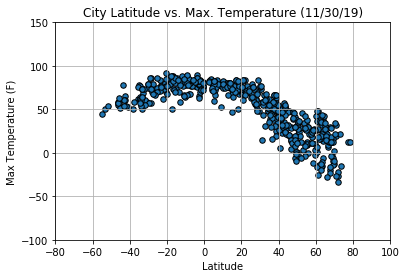

In [49]:
# Scatter plot for City Latitude vs. Max. Temperature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=30, edgecolors= "black")

# Graph properties
plt.title("City Latitude vs. Max. Temperature (11/30/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-100, 150)

# Save the figure
plt.savefig("LatitudeVSTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

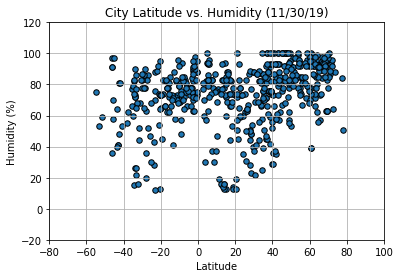

In [45]:
# Scatter plot for City Latitude vs. Humidity 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=30, edgecolors= "black")

# Graph properties
plt.title("City Latitude vs. Humidity (11/30/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# Save the figure
plt.savefig("LatitudeVSHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

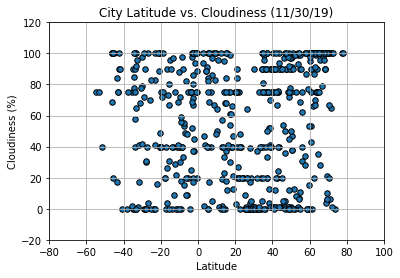

In [47]:
# Scatter plot for City Latitude vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=30, edgecolors= "black")

# Graph properties
plt.title("City Latitude vs. Cloudiness (11/30/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-20, 120)

# Save the figure
plt.savefig("LatitudeVSCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

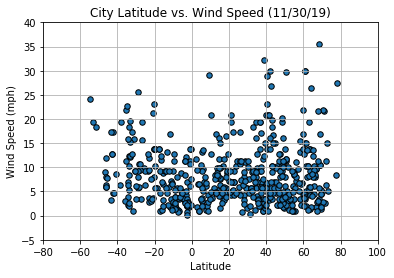

In [48]:
# Scatter plot for City Latitude vs. Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=30, edgecolors= "black")

# Graph properties
plt.title("City Latitude vs. Wind Speed (11/30/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-80, 100)
plt.ylim(-5, 40)

# Save the figure
plt.savefig("LatitudeVSWindSpeed.png")

# Show plot
plt.show()

In [ ]:
#ANALYSIS:
#    You wiil find the analysis in a pdf called "ANALYSIS_API_Weather" in
#    the "starter_code" folder
    


